In [35]:
import os
import io
import pathlib
import uuid
import zipfile as zpf
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nrrd

from typing import Union, Dict, List
from PIL import Image

In [36]:

testfile_path = pathlib.Path('C:/Users/Jannik/Desktop/mrbreader/tests/assets/mu_ct_seg.mrb')
assert testfile_path.is_file()

In [37]:
mrbfile = zpf.ZipFile(testfile_path, mode='r')

In [38]:
print(mrbfile.namelist())

['mu_ct_seg/', 'mu_ct_seg/Data/Segmentation.seg.nrrd', 'mu_ct_seg/Data/series description.nrrd', 'mu_ct_seg/mu_ct_seg.mrml', 'mu_ct_seg/mu_ct_seg.png']


mu_ct_seg/
mu_ct_seg/Data/Segmentation.seg.nrrd
mu_ct_seg/Data/series description.nrrd
mu_ct_seg/mu_ct_seg.mrml
mu_ct_seg/mu_ct_seg.png
<ZipInfo filename='mu_ct_seg/mu_ct_seg.png' filemode='-rw-r--r--' file_size=596989>
IMG DATA SHAPE: (924, 1920, 4)


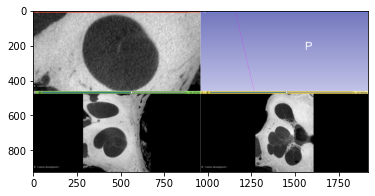

In [39]:
for item in mrbfile.infolist():
    print(item.filename)
    if item.filename.endswith('.png'):

        # img_data = Image.frombytes(f.read(item))
        print(item)

        img_data = Image.open(io.BytesIO(mrbfile.read(item)))

        img_data = np.asarray(img_data)


        print(f'IMG DATA SHAPE: {img_data.shape}')

        fig, ax = plt.subplots()
        ax.imshow(img_data)

        plt.show()

In [40]:
infolist = mrbfile.infolist()
infolist

[<ZipInfo filename='mu_ct_seg/' filemode='drwxr-xr-x'>,
 <ZipInfo filename='mu_ct_seg/Data/Segmentation.seg.nrrd' filemode='-rw-r--r--' file_size=868625>,
 <ZipInfo filename='mu_ct_seg/Data/series description.nrrd' filemode='-rw-r--r--' file_size=92367088>,
 <ZipInfo filename='mu_ct_seg/mu_ct_seg.mrml' filemode='-rw-r--r--' file_size=81560>,
 <ZipInfo filename='mu_ct_seg/mu_ct_seg.png' filemode='-rw-r--r--' file_size=596989>]

In [41]:
os.getcwd()

'c:\\Users\\Jannik\\Desktop\\mrbreader\\reader'

In [42]:
mrbfile.extractall(path='c:\\Users\\Jannik\\Desktop\\mrbreader\\tests\\assets')

In [43]:
seg = nrrd.read('C:/Users/Jannik/Desktop/mrbreader/tests/assets/mu_ct_seg/Data/Segmentation.nrrd')

In [44]:
sedesc = nrrd.read('C:/Users/Jannik/Desktop/mrbreader/tests/assets/mu_ct_seg/Data/series description.nrrd')

In [45]:
f'Shape: {seg[0].shape} Dtype: {seg[0].dtype}'

'Shape: (517, 446, 597) Dtype: uint8'

In [46]:
len(sedesc)
for elem in sedesc:
    print(type(elem))

<class 'numpy.ndarray'>
<class 'collections.OrderedDict'>


In [47]:
sedesc[0].shape

(517, 446, 597)

In [48]:
sedesc[1]

OrderedDict([('type', 'unsigned char'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([517, 446, 597])),
             ('space directions',
              array([[1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('encoding', 'gzip'),
             ('space origin', array([0., 0., 0.]))])

In [49]:
print(f'sedesc shape: {sedesc.shape}')

AttributeError: 'tuple' object has no attribute 'shape'

In [50]:
seg_data = seg[0]

In [51]:
# segmentation volume unique elements
np.unique(seg_data.flatten())

array([0, 1], dtype=uint8)

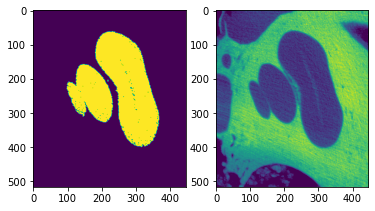

In [52]:
# %matplotlib widget
fig, axes = plt.subplots(ncols=2)

axes = axes.flat

ax = axes[0]
ax.imshow(seg_data[..., 150])

ax = axes[1]
ax.imshow(sedesc[0][..., 150])

In [53]:
multiseg_mrbfile = pathlib.Path('C:/Users/Jannik/Desktop/mrbreader/tests/assets/testmrb_multiseg.mrb')

assert multiseg_mrbfile.is_file()

In [54]:
multiseg_mrbfile = zpf.ZipFile(multiseg_mrbfile)

In [55]:
multiseg_mrbfile.extractall(path='c:\\Users\\Jannik\\Desktop\\mrbreader\\tests\\assets')


In [56]:
seg2 = nrrd.read('C:/Users/Jannik/Desktop/mrbreader/tests/assets/testmrb_multiseg/Data/Segmentation.seg.nrrd')

In [57]:
(type(seg2[0]),type(seg2[1]))

(numpy.ndarray, collections.OrderedDict)

In [58]:
seg2[1]

OrderedDict([('type', 'unsigned char'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([512, 512, 396])),
             ('space directions',
              array([[ 4.66131453e-01,  1.50963094e-06, -8.63612136e-04],
                     [ 3.80595722e-08,  4.66131505e-01,  8.35360316e-04],
                     [ 8.63613455e-04, -8.35358953e-04,  4.66130705e-01]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('encoding', 'gzip'),
             ('space origin',
              array([-177.39205719, -248.80180532, -255.56940304])),
             ('Segment0_Color', '0.501961 0.682353 0.501961'),
             ('Segment0_ColorAutoGenerated', '1'),
             ('Segment0_Extent', '269 310 172 200 182 207'),
             ('Segment0_ID', 'Segment_1'),
             ('Segment0_LabelValue', '1'),
             ('Segment0_Layer', '0'),
             ('Segment0_Name', 'Cochlea'),
             ('Segment0_NameAutoGenerat

In [59]:
seg2[0].shape

(512, 512, 396)

In [60]:
np.unique(seg2[0])

array([0, 1, 2, 3], dtype=uint8)

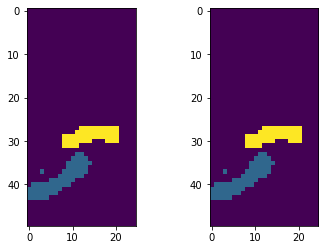

In [61]:
# %matplotlib widget
fig, axes = plt.subplots(ncols=2)

axes = axes.flat

idx = 190

ax = axes[0]
ax.imshow(seg2[0][250:300, 175:200, idx])

ax = axes[1]
ax.imshow(seg2[0][250:300, 175:200, idx])

In [62]:
multiseg_mrbfile.infolist()

[<ZipInfo filename='testmrb_multiseg/' filemode='drwxr-xr-x'>,
 <ZipInfo filename='testmrb_multiseg/Data/1 DCT Head Clear Nat Fill Full HU Normal AX3D.nrrd' filemode='-rw-r--r--' file_size=114010529>,
 <ZipInfo filename='testmrb_multiseg/Data/Segmentation.seg.nrrd' filemode='-rw-r--r--' file_size=106858>,
 <ZipInfo filename='testmrb_multiseg/testmrb_multiseg.mrml' filemode='-rw-r--r--' file_size=61308>,
 <ZipInfo filename='testmrb_multiseg/testmrb_multiseg.png' filemode='-rw-r--r--' file_size=442204>]

In [63]:
seg_infofile = multiseg_mrbfile.infolist()[2]
seg_infofile

<ZipInfo filename='testmrb_multiseg/Data/Segmentation.seg.nrrd' filemode='-rw-r--r--' file_size=106858>

In [64]:
# read data directly
seg_volume_rawbytes = multiseg_mrbfile.read(seg_infofile)



In [65]:
# as nrrd

seg_volume = io.BytesIO(seg_volume_rawbytes)
type(seg_volume)

_io.BytesIO

In [66]:
seg_volume_header = nrrd.read_header(seg_volume)

In [67]:
seg_volume_header

OrderedDict([('type', 'unsigned char'),
             ('dimension', 3),
             ('space', 'left-posterior-superior'),
             ('sizes', array([512, 512, 396])),
             ('space directions',
              array([[ 4.66131453e-01,  1.50963094e-06, -8.63612136e-04],
                     [ 3.80595722e-08,  4.66131505e-01,  8.35360316e-04],
                     [ 8.63613455e-04, -8.35358953e-04,  4.66130705e-01]])),
             ('kinds', ['domain', 'domain', 'domain']),
             ('encoding', 'gzip'),
             ('space origin',
              array([-177.39205719, -248.80180532, -255.56940304])),
             ('Segment0_Color', '0.501961 0.682353 0.501961'),
             ('Segment0_ColorAutoGenerated', '1'),
             ('Segment0_Extent', '269 310 172 200 182 207'),
             ('Segment0_ID', 'Segment_1'),
             ('Segment0_LabelValue', '1'),
             ('Segment0_Layer', '0'),
             ('Segment0_Name', 'Cochlea'),
             ('Segment0_NameAutoGenerat

In [68]:
seg_volume_data = nrrd.read_data(seg_volume_header, seg_volume)

In [69]:
seg_volume_data.shape

(512, 512, 396)

In [70]:
''.split(' ')

['']

In [71]:
float('As')

ValueError: could not convert string to float: 'As'

In [72]:
from taggedarrays import SegmentInfo

In [73]:
seginfos = SegmentInfo.from_header(seg_volume_header)

TypeError: __init__() missing 8 required positional arguments: 'name', 'ID', 'label_value', 'extent', 'color_autogenerated', 'layer', 'name_autogenerated', and 'tags'